# MNIST con SVMs

**Lectura de MNIST:**

In [1]:
from tensorflow import keras; from keras.datasets import mnist
from sklearn.model_selection import train_test_split
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')
x_train /= 255; x_test /= 255
# N_train = 5000; x_train = x_train[:N_train, :]; y_train = y_train[:N_train]
# N_test  = 1000; x_test = x_test[:N_test, :]; y_test = y_test[:N_test]

**SVM sin kernel:**

In [2]:
from sklearn import svm; from sklearn.metrics import accuracy_score
C = 1; clf = svm.SVC(C=C, kernel='linear').fit(x_train, y_train)
err_train = 1 - accuracy_score(y_train, clf.predict(x_train))
err_test = 1 - accuracy_score(y_test, clf.predict(x_test))
print(f'Error: train {err_train:.1%} test {err_test:.1%}')

Error: train 2.9% test 6.0%


**SVM con kernel RBF:**

In [3]:
from sklearn import svm; from sklearn.metrics import accuracy_score
C = 1; clf = svm.SVC(C=C, kernel='rbf').fit(x_train, y_train)
err_train = 1 - accuracy_score(y_train, clf.predict(x_train))
err_test = 1 - accuracy_score(y_test, clf.predict(x_test))
print(f'Error: train {err_train:.1%} test {err_test:.1%}')

Error: train 1.0% test 2.1%


## Ejercicio

Halla una SVM de mínimo error en MNIST probando diferentes valores de $C$ y kernels. Por cada kernel probado, describe los experimentos realizados y presenta los resultados obtenidos mediante gráficas que faciliten su interpretación.

In [4]:
from tensorflow import keras; from keras.datasets import mnist
from sklearn.model_selection import train_test_split
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')
x_train /= 255; x_test /= 255
# N_train = 5000; x_train = x_train[:N_train, :]; y_train = y_train[:N_train]
# N_test  = 1000; x_test = x_test[:N_test, :]; y_test = y_test[:N_test]

from sklearn import svm; from sklearn.metrics import accuracy_score
# Valores de C y kernels a probar
C_values = [10, 1, 0.1]
kernels = ['linear', 'rbf', 'poly']


In [ ]:
# Almacenar resultados para cada combinación de C y kernel
results = []
it =0
# Bucle para probar diferentes valores de C y kernels
for C in C_values:
    for kernel in kernels:
        # Imprimir información de la iteración
        print(f"Iteracion: {it + 1}, Parametros: C={C}, Kernel={kernel}")
        # Entrenar el clasificador SVM
        clf = svm.SVC(C=C, kernel=kernel).fit(x_train, y_train)

        # Calcular errores de entrenamiento y prueba
        err_train = 1 - accuracy_score(y_train, clf.predict(x_train))
        err_test = 1 - accuracy_score(y_test, clf.predict(x_test))

        # Almacenar resultados
        results.append({'C': C, 'kernel': kernel, 'err_train': err_train, 'err_test': err_test})

Resultados de ejecucion del codigo en Google Colabs:

{'C': 10, 'kernel': 'linear', 'err_train': 0.02028333333333332, 'err_test': 0.06889999999999996}

{'C': 10, 'kernel': 'rbf', 'err_train': 9.999999999998899e-05, 'err_test': 0.01629999999999998}

{'C': 10, 'kernel': 'poly', 'err_train': 0.00029999999999996696, 'err_test': 0.021399999999999975}

{'C': 1, 'kernel': 'linear', 'err_train': 0.029266666666666663, 'err_test': 0.059599999999999986}

{'C': 1, 'kernel': 'rbf', 'err_train': 0.010083333333333333, 'err_test': 0.02080000000000004}

{'C': 1, 'kernel': 'poly', 'err_train': 0.008383333333333298, 'err_test': 0.02290000000000003}

{'C': 0.1, 'kernel': 'linear', 'err_train': 0.04121666666666668, 'err_test': 0.05279999999999996}

{'C': 0.1, 'kernel': 'rbf', 'err_train': 0.03778333333333328, 'err_test': 0.04049999999999998}

{'C': 0.1, 'kernel': 'poly', 'err_train': 0.03911666666666669, 'err_test': 0.04279999999999995}

In [1]:
#Resultados obtenidos en google colab:
results = [{'C': 10, 'kernel': 'linear', 'err_train': 0.02028333333333332, 'err_test': 0.06889999999999996}, {'C': 10, 'kernel': 'rbf', 'err_train': 9.999999999998899e-05, 'err_test': 0.01629999999999998}, {'C': 10, 'kernel': 'poly', 'err_train': 0.00029999999999996696, 'err_test': 0.021399999999999975}, {'C': 1, 'kernel': 'linear', 'err_train': 0.029266666666666663, 'err_test': 0.059599999999999986}, {'C': 1, 'kernel': 'rbf', 'err_train': 0.010083333333333333, 'err_test': 0.02080000000000004}, {'C': 1, 'kernel': 'poly', 'err_train': 0.008383333333333298, 'err_test': 0.02290000000000003}, {'C': 0.1, 'kernel': 'linear', 'err_train': 0.04121666666666668, 'err_test': 0.05279999999999996}, {'C': 0.1, 'kernel': 'rbf', 'err_train': 0.03778333333333328, 'err_test': 0.04049999999999998}, {'C': 0.1, 'kernel': 'poly', 'err_train': 0.03911666666666669, 'err_test': 0.04279999999999995}]

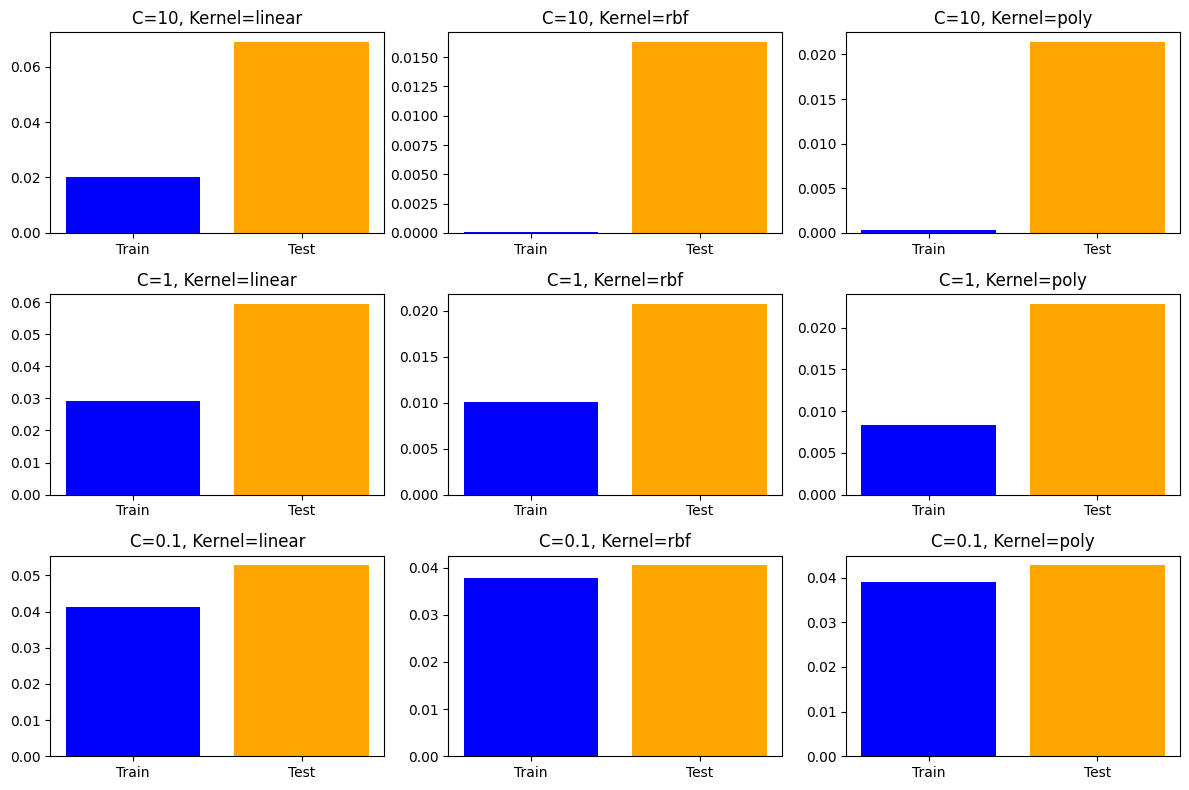

In [5]:
import matplotlib.pyplot as plt
# Crear gráficas para visualizar los resultados
fig, axes = plt.subplots(nrows=len(C_values), ncols=len(kernels), figsize=(12, 8))

for i, C in enumerate(C_values):
    for j, kernel in enumerate(kernels):
        result = [res for res in results if res['C'] == C and res['kernel'] == kernel][0]
        axes[i, j].bar(['Train', 'Test'], [result['err_train'], result['err_test']], color=['blue', 'orange'])
        axes[i, j].set_title(f'C={C}, Kernel={kernel}')

plt.tight_layout()
plt.show()

La mejor combinacion de parametros para SVM en la tarea de clasificación MNISNT es: 

tipo de kernel: rbf 

C = 10